## <p style='text-align: center;'> Analyse des sentiments Tweets 😀 😢 </p> 

****

<span style="color: DimGray"> **1.1 Importation des bibliothèques**  </span>

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np



<span Style="color: DimGray"> **1.2 Importation des données**</span> 

In [2]:
colonnes= ['ids', 'Target', 'text']
df1 = pd.read_csv('datasets\Sentiment140-MV-Train.csv',names=colonnes)
df2=pd.read_csv('datasets\Sentiment140-MV-Test.csv',names=colonnes)
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
df.head()

,ids,Target,text
0,1834873030,1,USER_MENTION oh that sounds yummy we dont have...
1,2062647136,0,USER_MENTION theres so many fakes of you
2,2013029024,1,USER_MENTION um nothing new apart from street ...
3,2184368404,1,USER_MENTION USER_MENTION the day cnn started ...
4,2214865531,0,missing my dad my brother today


<span style="color:DimGray"> **1.3 exploration des données**</span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     19995 non-null  int64 
 1   Target  19995 non-null  int64 
 2   text    19995 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.8+ KB


In [5]:
df.isnull().sum()

ids       0
Target    0
text      0
dtype: int64

In [6]:
df.duplicated().sum()

1782

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Target'].value_counts()

Target
1    11628
0     6585
Name: count, dtype: int64

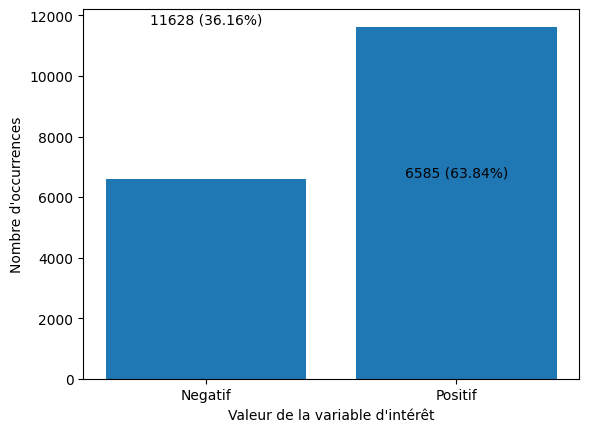

In [9]:
target_counts = df['Target'].value_counts()

# Calcul du proportion pour chaque valeur de la variable d'intérêt (Target)
target_proportions = df['Target'].value_counts(normalize=True)

# Création d'un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajoute des étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiquetage de l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajoute d'une légende aux barres
plt.xticks(target_counts.index, ['Positif', 'Negatif'])

# Affichage du graphique
plt.show()

In [10]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [13]:
def lemmitizer(content):
    # Suppression des caractères non alphabétiques
    texte_nettoye = re.sub('[^a-zA-Z]', ' ', content)
    # Suppression des adresses URL
    content = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', content)
    content = content.lower()
    # Tokenization
    tokens = content.split()
    # Lemmatisation et suppression des mots vides
    lemmitized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    # Reconstruction du texte
    lemmitized_text = ' '.join(lemmitized_tokens)
    return lemmitized_text


# On applique le nettoyage du texte sur la colonne 'texte'
df['texte_nettoye'] = df['text'].apply(lemmitizer)

In [14]:
df.head()

,ids,Target,text,texte_nettoye
0,1834873030,1,USER_MENTION oh that sounds yummy we dont have...,user_mention sound yummy dont bloomingdales th...
1,2062647136,0,USER_MENTION theres so many fakes of you,user_mention there many fake
2,2013029024,1,USER_MENTION um nothing new apart from street ...,user_mention nothing new apart street fighter
3,2184368404,1,USER_MENTION USER_MENTION the day cnn started ...,user_mention user_mention day cnn started sour...
4,2214865531,0,missing my dad my brother today,missing dad brother today


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

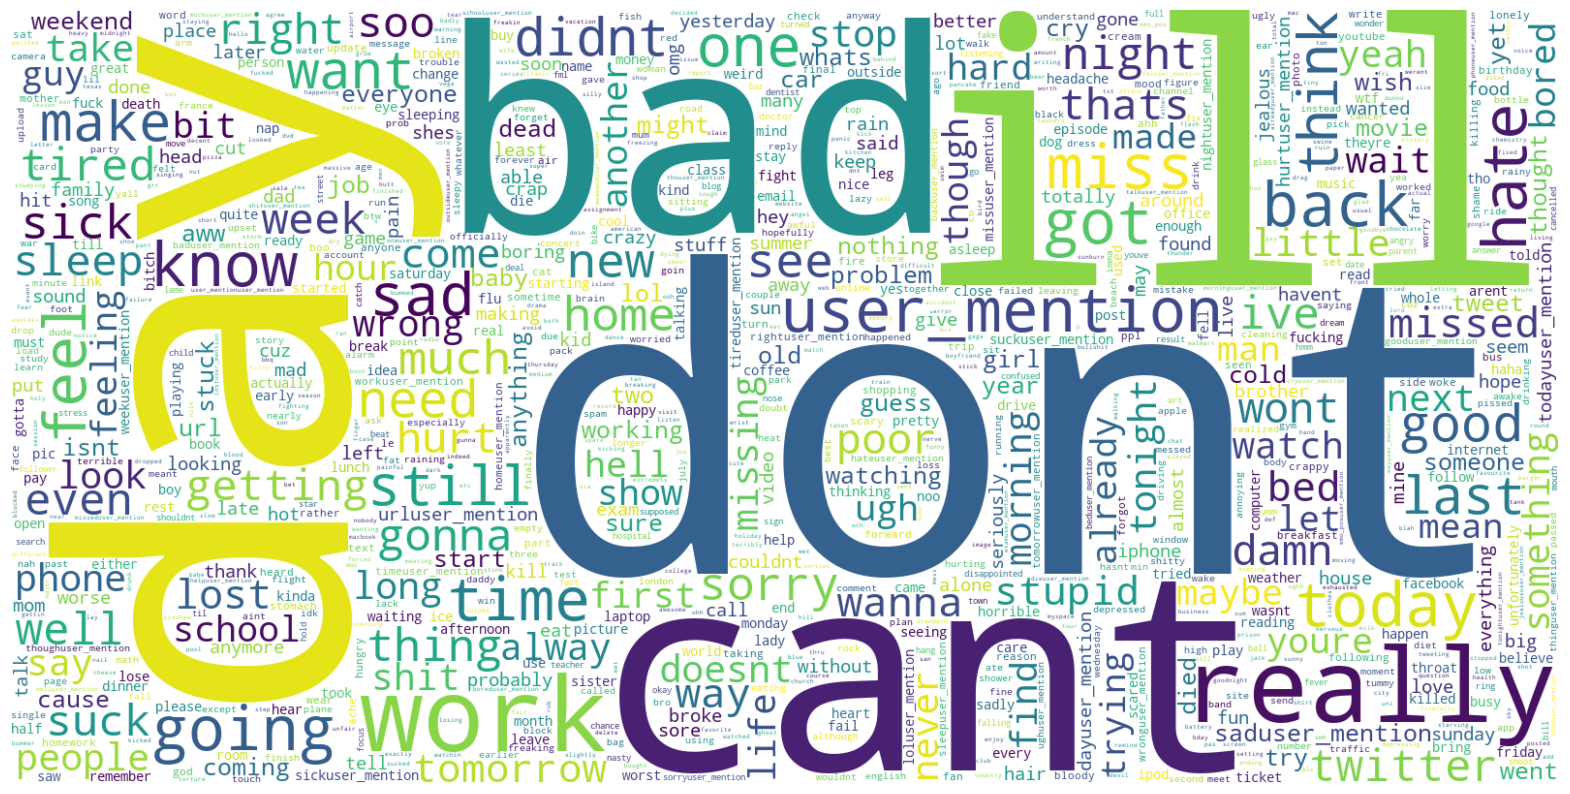

In [16]:
#filtrage des tweets Negatif 
data_neg= df[df['Target'] == 0]['texte_nettoye']

#Création d'un nuage de mots  
wc = WordCloud(max_words = 1000, width=1600, height = 800, collocations= False, background_color='white').generate("".join(data_neg))

#affichage 
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

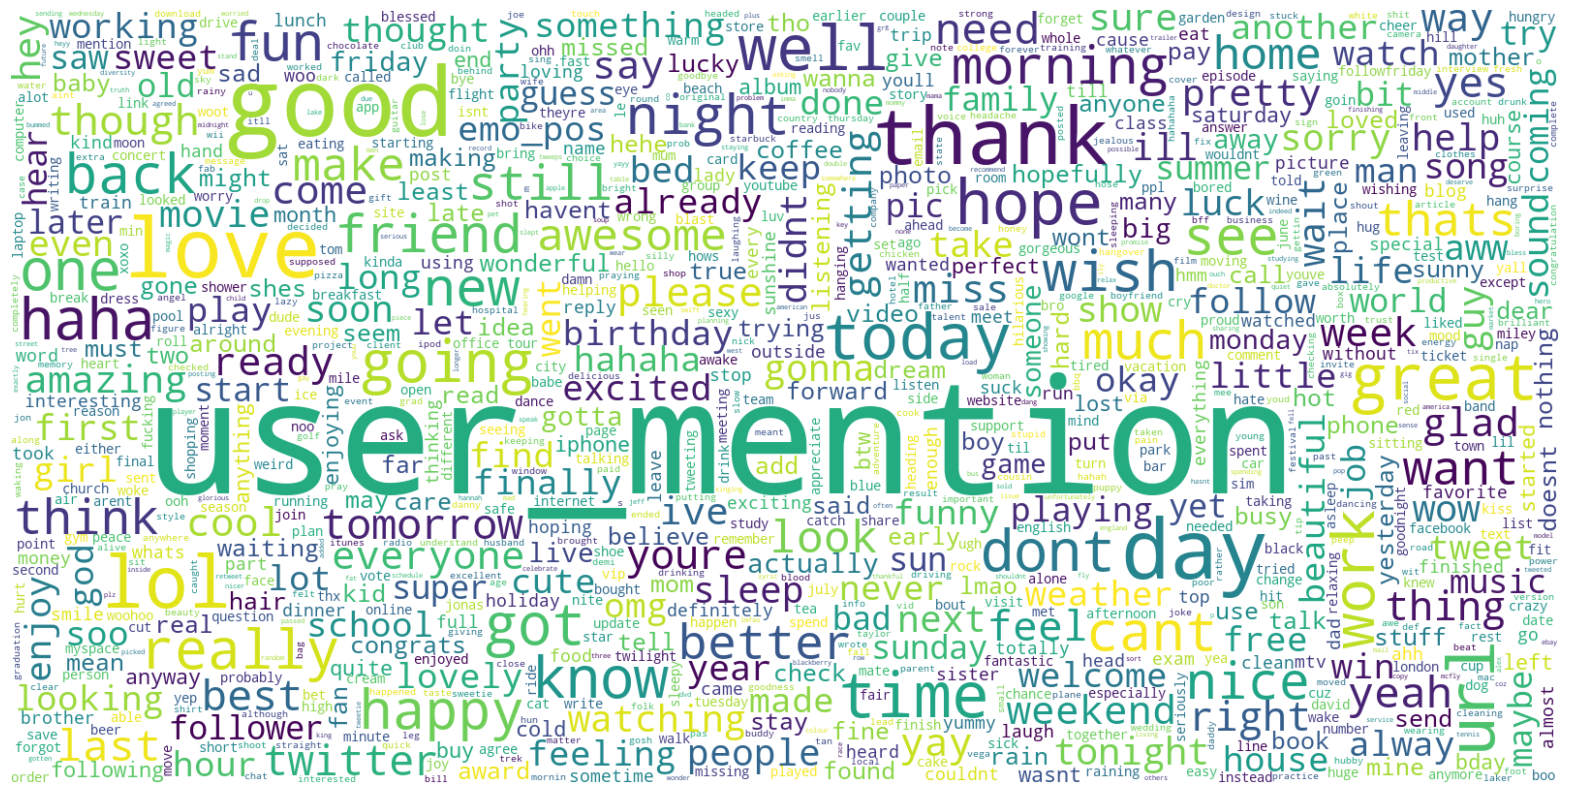

In [17]:
#filtrage des tweets posifit
data_neg = df[df['Target'] == 1]['texte_nettoye']

# Créer un nuage de mots à partir des données négatives
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False, background_color='white').generate(" ".join(data_neg))

# Afficher le nuage de mots
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* Séparation des données

In [18]:
# Séparation des données en features (X) et target (Y)
X = df['texte_nettoye'].values
Y = df['Target'].values

In [19]:
# Division du dataset en ensembles d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42) 

In [30]:

# Vectorisation des données
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [41]:
# Entraînement du modèle avec validation croisée stratifiée
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    model = MultinomialNB()
    model.fit(vectorizer.transform(X_train_fold), y_train_fold)

    y_pred_fold = model.predict(vectorizer.transform(X_val_fold))
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

In [42]:
# Calcul de la moyenne des précisions
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.7879993427450902


In [43]:

# Calcul de la moyenne des précisions
avg_accuracy = np.mean(accuracies)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.7879993427450902


In [44]:
# Recherche des meilleurs hyperparamètres
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)
print("Best Accuracy:", grid_search.best_score_)
print("Best Alpha:", grid_search.best_params_['alpha'])

Best Accuracy: 0.8114462443887278
Best Alpha: 0.5


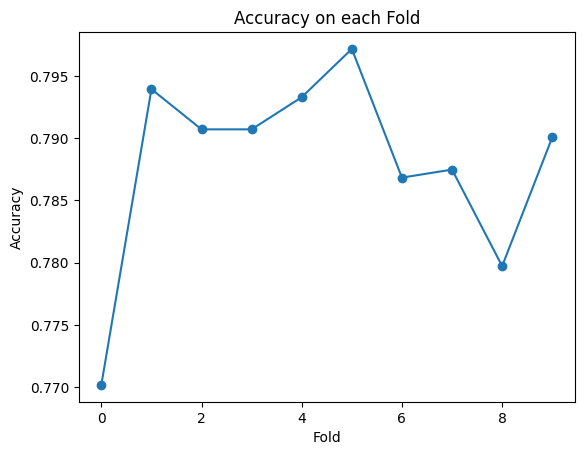

In [46]:
# Tracer un graphique de la précision sur chaque pli
plt.plot( accuracies, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy on each Fold')
plt.show()

In [47]:
# Réentraînement du modèle avec les meilleurs hyperparamètres
best_model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_model.fit(X_train_vec, y_train)

MultinomialNB(alpha=0.5)

In [48]:

# Prédiction sur l'ensemble de test
y_pred_test = best_model.predict(X_test_vec)

In [49]:

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 526  467]
 [  54 1685]]


In [50]:
# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8092972181551976
Precision: 0.7829925650557621
Recall: 0.9689476710753306
F1 Score: 0.8661012593163712
